In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import sklearn as sk
import scipy as sp
from sklearn import preprocessing as pp

### 1 Загрузить файл hr.csv.

In [2]:
df = pd.read_csv('C:/Users/Kanris/Desktop/data/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2 Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [8]:
mean =pd.DataFrame(df[[col for col in list(df.columns) if col != 'sales' and col != 'salary']].apply(lambda x: st.mean(x)))

In [9]:
mean = mean.rename(columns={0:'Mean'})
print ('Средние значения по параметрам :')
mean

Средние значения по параметрам :


,Mean
satisfaction_level,0.612834
last_evaluation,0.716102
number_project,3.803054
average_montly_hours,201.050337
time_spend_company,3.498233
Work_accident,0.144610
left,0.238083
promotion_last_5years,0.021268


In [11]:
median = pd.DataFrame(df[[col for col in list(df.columns) if col != 'sales' and col != 'salary']].apply(lambda x: st.median(x)))
median = median.rename(columns = {0:'Median'})
print('Медиана по параметрам:')
median

Медиана по параметрам:


,Median
satisfaction_level,0.64
last_evaluation,0.72
number_project,4.00
average_montly_hours,200.00
time_spend_company,3.00
Work_accident,0.00
left,0.00
promotion_last_5years,0.00


In [58]:
mode= pd.DataFrame((df[[col for col in list(df.columns) ]].apply(lambda x: sp.stats.mode(x).mode))).T
print('Мода по параметрам:')
mode=mode.rename(columns = {0:'Mode'})
mode

Мода по параметрам:


,Mode
satisfaction_level,0.1
last_evaluation,0.55
number_project,4
average_montly_hours,135
time_spend_company,3
Work_accident,0
left,0
promotion_last_5years,0
sales,sales
salary,low


In [68]:
min_max= pd.DataFrame(df[[col for col in list(df.columns) if col != 'sales' and col != 'salary']]).apply([min,max]).T
print('Минимальные/максимальные значения равны :')
min_max

Минимальные/максимальные значения равны :


,min,max
satisfaction_level,0.09,1.0
last_evaluation,0.36,1.0
number_project,2.00,7.0
average_montly_hours,96.00,310.0
time_spend_company,2.00,10.0
Work_accident,0.00,1.0
left,0.00,1.0
promotion_last_5years,0.00,1.0


In [78]:
pstdev= pd.DataFrame(df[[col for col in list(df.columns) if col != 'sales' and col != 'salary']].apply(st.pstdev))
print('Стандартное отклонение :')
pstdev = pstdev.rename(columns = {0:'pstDev'})
pstdev

Стандартное отклонение :


,pstDev
satisfaction_level,0.248622
last_evaluation,0.171163
number_project,1.232551
average_montly_hours,49.941434
time_spend_company,1.460088
Work_accident,0.351707
left,0.425910
promotion_last_5years,0.144277


### 3 Рассчитать и визуализировать корреляционную матрицу для переменных.

In [49]:
# назначаем индексы для зарплаты

In [50]:
sal =pd.DataFrame(df.salary.value_counts()).reset_index()

In [51]:
sal

,index,salary
0,low,7316
1,medium,6446
2,high,1237


In [52]:
salary_norm={}
x = 1
for i in sal.index:
    salary_norm[sal['index'].loc[i]] = x
    x=x+1
salary_norm

{'low': 1, 'medium': 2, 'high': 3}

In [53]:
df['salary_norm'] = df.salary.apply(lambda x: salary_norm[x])
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_norm
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [54]:
# назначаем индексы для департаментов

In [55]:
sales = pd.DataFrame(df.sales.value_counts()).reset_index()
sales

,index,sales
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [56]:
dep_norm={}
x = 1
for i in sales.index:
    dep_norm[sales['index'].loc[i]] = x
    x=x+1
dep_norm

{'sales': 1,
 'technical': 2,
 'support': 3,
 'IT': 4,
 'product_mng': 5,
 'marketing': 6,
 'RandD': 7,
 'accounting': 8,
 'hr': 9,
 'management': 10}

In [57]:
df['dep_norm'] = df.sales.apply(lambda x: dep_norm[x])
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_norm,dep_norm
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1


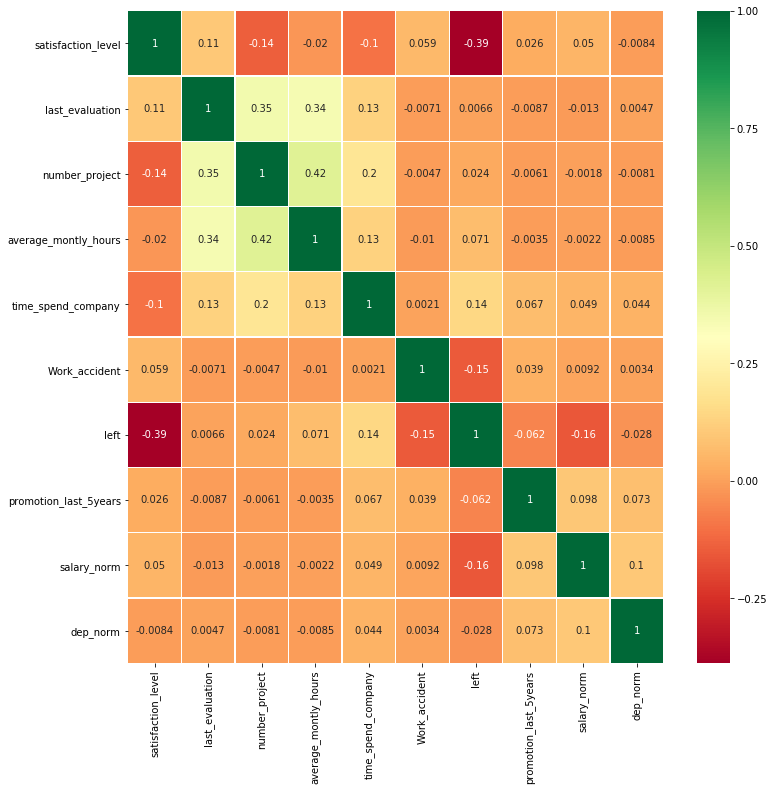

In [58]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### 4 Визуализировать несколько взаимосвязей между переменными.

In [41]:
from scipy.stats import pearsonr as prs
from sklearn import preprocessing as pp
from scipy.stats import pearsonr

min_max_scaler = pp.MinMaxScaler(feature_range=(0,1))
scaled = min_max_scaler.fit_transform(df[[col for col in list(df.columns) if col != 'sales' and col != 'salary']])
df_norm = pd.DataFrame(scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.5
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.5
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0


In [42]:
names = list(df.columns)
names.remove('sales')
names.remove('salary')
names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary_norm']

In [43]:
df_norm.columns = names
df_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_norm
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.5
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.5
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0


Корреляция между last_evaluation и average_montly_hours = 0.339742


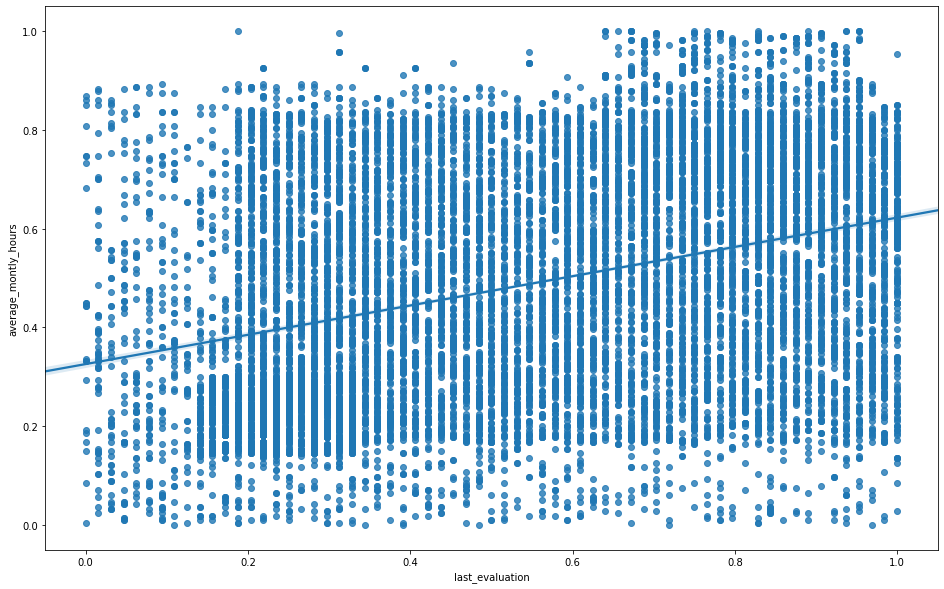

In [202]:
plt.figure(figsize=(16,10))
sns.regplot(df_norm.last_evaluation,df_norm.average_montly_hours, fit_reg=True)
corr, p_value = pearsonr(df_norm.last_evaluation,df_norm.average_montly_hours)
print("Корреляция между %s и %s = %f" %('last_evaluation','average_montly_hours',corr))

Корреляция между last_evaluation и number_project = 0.349333


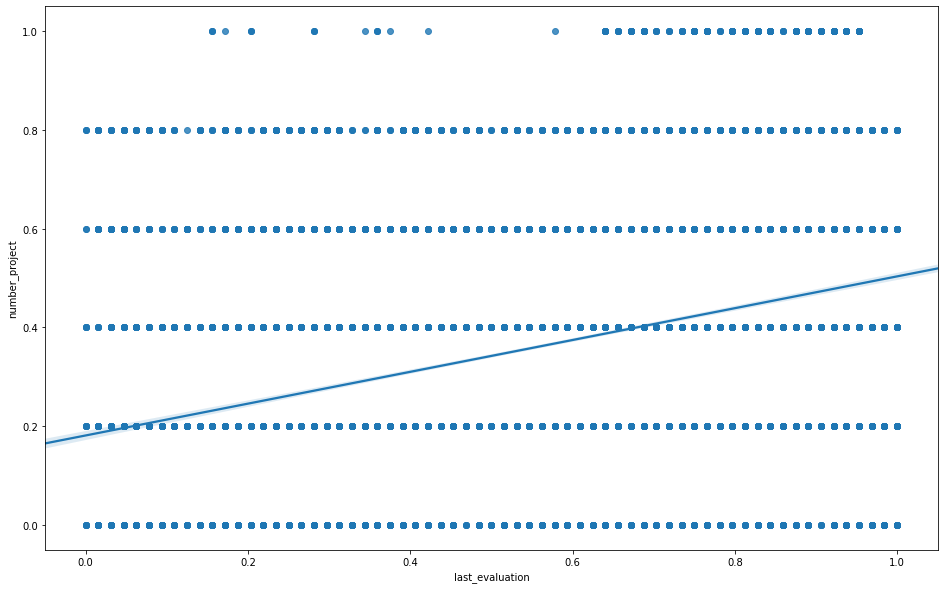

In [204]:
plt.figure(figsize=(16,10))
sns.regplot(df_norm.last_evaluation,df_norm.number_project, fit_reg=True)
corr, p_value = pearsonr(df_norm.last_evaluation,df_norm.number_project)
print("Корреляция между %s и %s = %f" %('last_evaluation','number_project',corr))

Корреляция между average_montly_hours и number_project = 0.417211


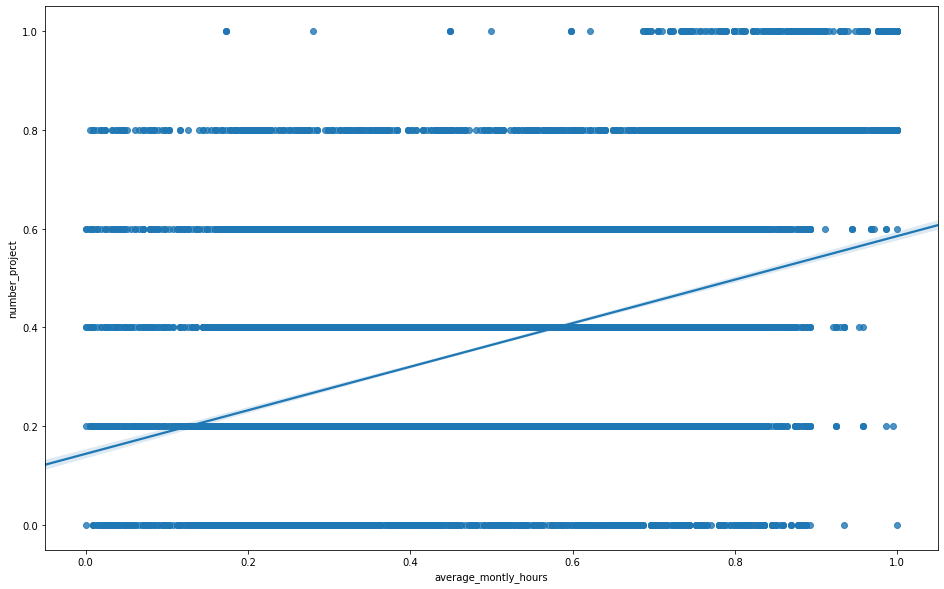

In [205]:
plt.figure(figsize=(16,10))
sns.regplot(df_norm.average_montly_hours,df_norm.number_project, fit_reg=True)
corr, p_value = pearsonr(df_norm.average_montly_hours,df_norm.number_project)
print("Корреляция между %s и %s = %f" %('average_montly_hours','number_project',corr))

### 5 С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [9]:
from scipy import stats

In [10]:
low_sal_hour = df[df.salary == 'low']['average_montly_hours']
med_sal_hour = df[df.salary == 'medium']['average_montly_hours']
high_sal_hour = df[df.salary == 'high']['average_montly_hours']

In [11]:
stats.ttest_ind(low_sal_hour,med_sal_hour)

Ttest_indResult(statistic=-0.39900653336152675, pvalue=0.6898945822032512)

In [12]:
stats.ttest_ind(high_sal_hour,med_sal_hour)

Ttest_indResult(statistic=-0.9654006464129494, pvalue=0.3343745714238685)

In [13]:
stats.ttest_ind(low_sal_hour,high_sal_hour)

Ttest_indResult(statistic=0.7288680398062308, pvalue=0.4661023478267259)

###### можем сделать вывод что нет статистических различий по среднему времени в месяц между сотрудниками, сгруппированными по уровню зарплаты (pvalue во всех случаях выше дорустимого уровня в 0.05)

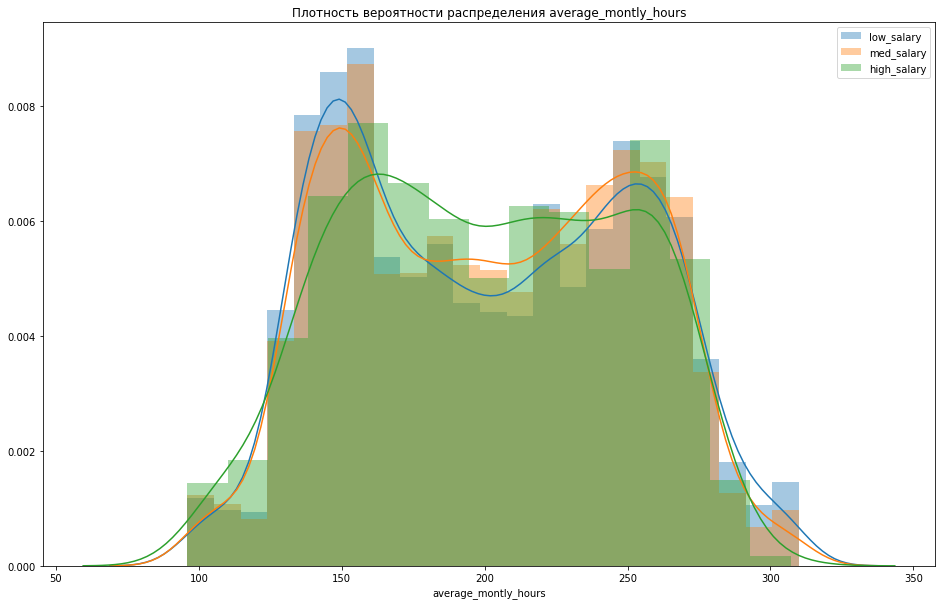

In [15]:
plt.figure(figsize=(16,10))
sns.distplot(low_sal_hour)
sns.distplot(med_sal_hour)
sns.distplot(high_sal_hour)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['low_salary', 'med_salary','high_salary'])
plt.show()

### 6 Рассчитать сколько работников работает в каждом департаменте.

In [17]:
no_of_cust = pd.DataFrame(df.sales.value_counts()).reset_index()

In [18]:
no_of_cust.columns = ['Department','No_of_empl']
no_of_cust

,Department,No_of_empl
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


### 7 Показать распределение сотрудников по зарплатам

In [34]:
sal = df.salary.value_counts()
sal

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

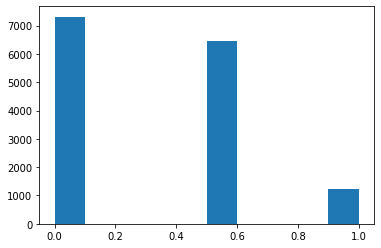

In [255]:
plt.hist(df_norm.salary_norm)

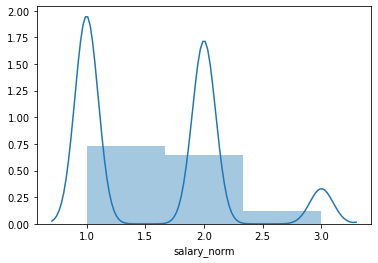

In [36]:
sns.distplot(df.salary_norm,bins=3)

In [319]:
sal =pd.DataFrame(sal).reset_index()

In [320]:
sal

,index,salary
0,low,7316
1,medium,6446
2,high,1237


<BarContainer object of 3 artists>

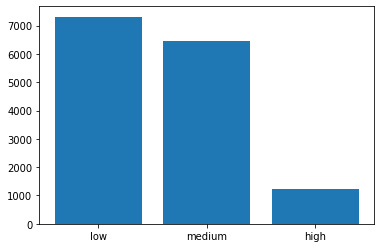

In [322]:
plt.bar(sal['index'],sal.salary)


### 8 Показать распределение сотрудников по зарплатам совместно с департаментами.

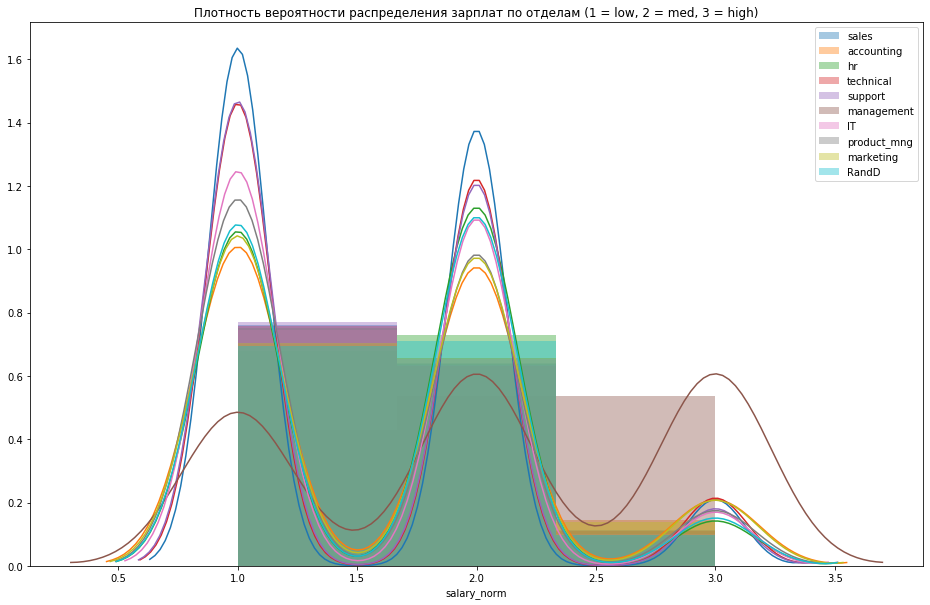

In [37]:
plt.figure(figsize=(16,10))
for i in df.sales.unique():
    sns.distplot(df[df.sales == str(i)]['salary_norm'],bins=3)
plt.title('Плотность вероятности распределения зарплат по отделам (1 = low, 2 = med, 3 = high)')
plt.legend(df.sales.unique())

#### можем заметить, что по всем департаментам распределение зарплат примерно одинаково, кроме департамента managment - в нем больше средних и высоких зарплат

### 9 Сколько сотрудников покинули компанию.

In [301]:
left = df[df.left == 1]

In [303]:
left.left.value_counts()

1    3571
Name: left, dtype: int64

### 10 Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

#### Анализировать причину увольнения предлагается на основании логистической регрессии так как результирующий параметр имеет 2 состояния(1,0)

Исключаем коррелирующие между собой показатели чтобы мсключить "лишние" критерии

In [60]:
round(df.corr(),2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_norm,dep_norm
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03,0.05,-0.01
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01,-0.01,0.00
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01,-0.00,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00,-0.00,-0.01
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07,0.05,0.04
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04,0.01,0.00
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06,-0.16,-0.03
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00,0.10,0.07
salary_norm,0.05,-0.01,-0.00,-0.00,0.05,0.01,-0.16,0.10,1.00,0.10
dep_norm,-0.01,0.00,-0.01,-0.01,0.04,0.00,-0.03,0.07,0.10,1.00


на основании матрицы можем сделать , что коррелирующих параметров не обнаружено( не исключаем критерии)

In [59]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_norm,dep_norm
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1


In [63]:
par = df.drop('left', axis=1)
par = par.drop('sales', axis=1)
par = par.drop('salary', axis=1)
left = df.left

In [64]:
par.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_norm,dep_norm
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

par_train, par_test, left_train, left_test = train_test_split(par, left, test_size=0.25, random_state=27)

In [67]:
model = LogisticRegression(solver='liblinear').fit(par_train, left_train)

In [68]:
from sklearn.metrics import classification_report

model_pred = model.predict(par_test)

print(classification_report(left_test, model_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      2916
           1       0.57      0.36      0.44       834

    accuracy                           0.80      3750
   macro avg       0.70      0.64      0.66      3750
weighted avg       0.78      0.80      0.78      3750



общая аккуратность 80% при этом низкие показатели для предсказания ушедших
проверим с помощью кросс валидации

In [81]:
par_train, par_test, left_train, left_test = train_test_split(par, left, test_size=0.25, random_state=42)
model1 = LogisticRegression(solver='liblinear',class_weight={}).fit(par_train, left_train)


model_pred1 = model1.predict(par_test)

print(classification_report(left_test, model_pred1))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2853
           1       0.59      0.33      0.42       897

    accuracy                           0.78      3750
   macro avg       0.70      0.63      0.64      3750
weighted avg       0.76      0.78      0.76      3750



результат остался примерно на том же уровне

In [88]:
why = pd.DataFrame(model1.coef_)

In [90]:
why.columns = par.columns

In [91]:
why

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_norm,dep_norm
0,-4.112048,0.643063,-0.296836,0.004622,0.251573,-1.465734,-1.232286,-0.668516,-0.02307


Наибольшее влияние на уход сотрудника оказывает satisfaction_level (чем ниже показатель тем больше вероятность ухода),Work_accident и promotion_last_5years( так же с отрицательным коэффициентом). average_montly_hours и dep_norm почти не влияют

In [99]:
par_clean = par[['satisfaction_level','last_evaluation','number_project','time_spend_company','Work_accident','promotion_last_5years','salary_norm']]

In [113]:
par_train, par_test, left_train, left_test = train_test_split(par_clean, left, test_size=0.25, random_state= 42)
model2 = LogisticRegression(solver='liblinear',class_weight={}).fit(par_train, left_train)

model_pred2 = model2.predict(par_test)

print(classification_report(left_test, model_pred1))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2853
           1       0.59      0.33      0.42       897

    accuracy                           0.78      3750
   macro avg       0.70      0.63      0.64      3750
weighted avg       0.76      0.78      0.76      3750



Исключив 2 параметра получили тот же уровень качества модели. Статистика по точности нахождения покинувших компанию при этом остается на низком уровне(0.42). Так же при различном показателе random_state значительно изменяется точность модели.  Поиск причин ухода требует дальнейшего анализа, на данном этапе сказать однозначно нельзя.